In [2]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_JQ9RvapSYY4.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@gameranxTV,Just took a quick look. Any PS4 fans finally h...,2018-12-09T21:07:24Z,107,630
1,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@Womenaretrash9777,It's like H1Z1 except It's worth playing and y...,2023-02-07T01:04:45Z,0,0
2,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@someblokecalleddave1,Been playing this on XBOX since the beginning....,2022-11-19T13:01:58Z,0,0
3,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@richie6921,I'm crap at this game. But I love it. Best gam...,2022-10-27T20:04:19Z,0,0
4,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@paddingtonsnare987,Heard about this game a couple years ago. A fr...,2022-09-30T04:56:13Z,0,0
...,...,...,...,...,...,...,...,...
1089,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@cheeliecheel8448,First,2018-12-09T21:07:28Z,0,0
1090,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@TheLocalDjent,Hi,2018-12-09T21:07:27Z,0,0
1091,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@somethingponosheci4742,First,2018-12-09T21:07:27Z,0,0
1092,https://www.youtube.com/watch?v=JQ9RvapSYY4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,2018-12-09T21:06:52Z,@foundersrunx6848,First,2018-12-09T21:07:25Z,0,0


In [4]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game", 
    "pubg", "ps4", "play", "fortnite", "better", "buy", "free", "xbox", 
    "blackout", "mobile","ill","tbh",
    "first","person"," lol","would","played","look","isnt","already,","gon","royal","already","plus","wait","want"



])
lmtzr = WordNetLemmatizer()

In [5]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [6]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
0,2018-12-09,Just took a quick look. Any PS4 fans finally h...,took quick look ps4 fan finally happy jump
221,2018-12-16,Ulefone s7?,ulefone
222,2018-12-16,PUBG May be OG but that release date was tooo ...,pubg may release date tooo late blackout cod b...
223,2018-12-16,I expect way more,expect
224,2018-12-16,All of these battle royales are personal prefe...,battle royales personal preference glad pubg f...
...,...,...,...
1089,2018-12-09,First,first
1090,2018-12-09,Hi,
1091,2018-12-09,First,first
1092,2018-12-09,First,first


In [7]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [8]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2018-12-09,Little too late imo. The battle royal genre is...,little late imo battle royal genre getting sta...,positive
1,2018-12-09,First,first,neutral
2,2018-12-10,Trash,trash,neutral
3,2018-12-12,Game is to broken and got taken out by the com...,game broken taken compilation released better ...,positive
4,2018-12-09,second i guess🤷‍♂️,second guess🤷‍♂️,neutral
...,...,...,...,...
495,2018-12-10,"""Unless you're just playing super smash bros, ...",unless super smash bros back would still waiti...,positive
496,2018-12-09,Playing smash as I watched this lmao,smash watched lmao,positive
497,2018-12-16,All of these battle royales are personal prefe...,battle royales personal preference glad pubg f...,positive
498,2018-12-09,"Haha man, did they fuck this port too? Like re...",haha man fuck port like remember xbone one por...,negative


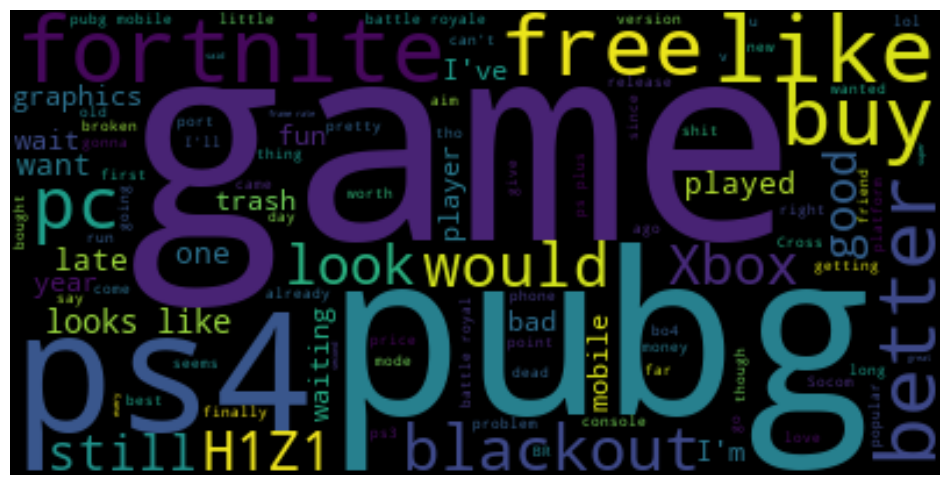

In [9]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

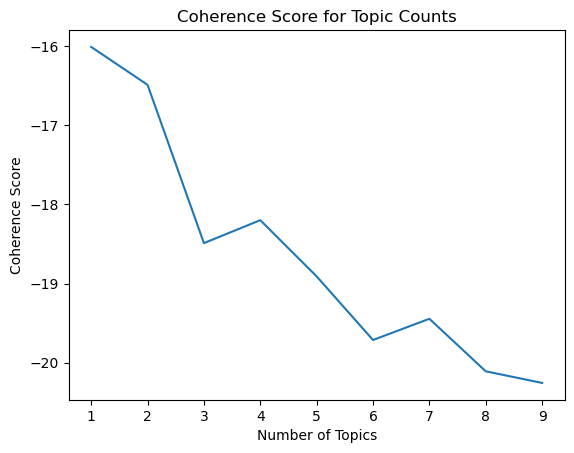

In [10]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [11]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 4
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.012*"lol" + 0.007*"late" + 0.006*"tho" + 0.005*"bought" + 0.005*"problem" + 0.005*"cancer" + 0.004*"player" + 0.004*"little" + 0.004*"version" + 0.004*"imo"'), (1, '0.017*"trash" + 0.012*"love" + 0.007*"crossplay" + 0.006*"black" + 0.006*"finally" + 0.004*"graphic" + 0.004*"stick" + 0.004*"soo" + 0.004*"title" + 0.004*"video"'), (2, '0.009*"cross" + 0.008*"console" + 0.007*"phone" + 0.007*"battle" + 0.007*"waiting" + 0.007*"ive" + 0.006*"royale" + 0.006*"wanted" + 0.005*"late" + 0.004*"mode"'), (3, '0.011*"still" + 0.010*"graphic" + 0.009*"dead" + 0.009*"best" + 0.008*"one" + 0.007*"shit" + 0.006*"version" + 0.005*"buying" + 0.005*"thing" + 0.004*"man"')]


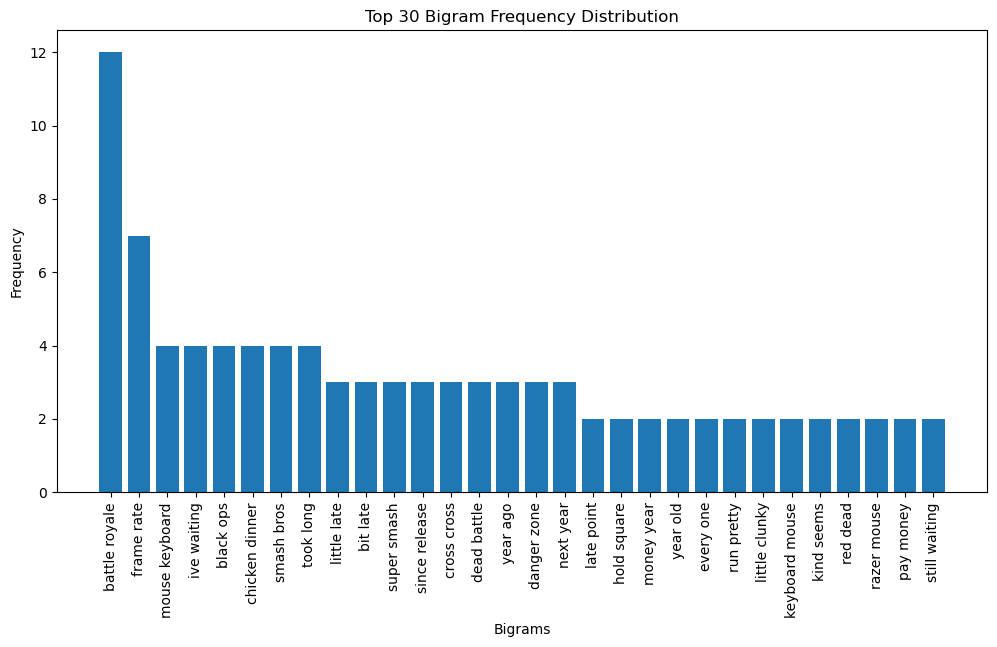

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [13]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df_good_topics.to_csv(file_path, index=False)
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,Apex Legends - Before You Buy,2
4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
